In [1]:
%matplotlib inline

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks 

In [54]:
#listing the galactic longitudes for which observations are taken
gal_long = [92.3, 84.9, 79.9, 74.8, 72.7, 66.6, 64.8, 54.8, 49.8, 44.8, 39.8, 34.8, 29.0, 25.0]
#initalizing the v_max list
v_max_list = []

In [55]:
#range of file nams of observed data
ids = range(38885,38898+1)

In [56]:
#analyzing the data 
for i in ids:
    #opening and reading the data file
    datafile = "E:/Sharan/Reads/spectrum_%d.txt" % (i)
    fun = open(datafile,'r')
    data = np.loadtxt(fun)
    fun.close()
    #column 0 contains the vel_lsr
    vel_lsr = data[:,0]
    #column 1 contains the corresponding intenisty/antenna_temp
    antenna_temp  = data[:,1]
    #plotting the data 
    plt.plot(vel_lsr,antenna_temp)
    plt.show()
    #finding the peaks of the curve 
    #only peaks having intensity of 20 or above are considered
    peaks, properties = find_peaks(antenna_temp, height = 20)
    #lists the heights of peak 
    peak_height = properties['peak_heights']
    #velocity corresponding to peaks 
    peak_vel = vel_lsr[peaks]
    #finding v max
    vel_max = max(peak_vel)
    print(vel_max)
    v_max_list.append(vel_max)



3.944803691625129
5.865708420633736
2.847113465681349
20.292795997575706
4.91476771189767
20.674045634701336
31.93144107469973
55.21204468063647
65.4341836069533
71.28192265438354
72.77375567715522
86.34385653573166
99.75
96.46


In [57]:


#printing the vales of all v max    
print('The vel_max at different galactic longitudes are: ', v_max_list)    
    

The vel_max at different galactic longitudes are:  [3.944803691625129, 5.865708420633736, 2.847113465681349, 20.292795997575706, 4.91476771189767, 20.674045634701336, 31.93144107469973, 55.21204468063647, 65.4341836069533, 71.28192265438354, 72.77375567715522, 86.34385653573166, 99.75, 96.46]


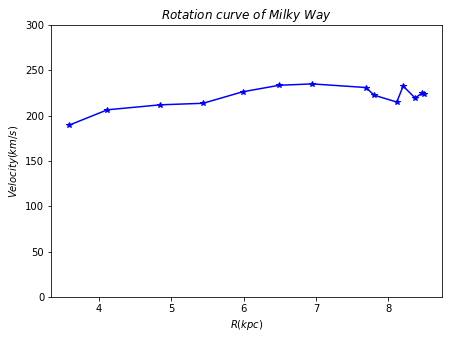

In [76]:
from astropy import units as u
#distance of sun from galactic centre
Ro = 8.5e3 * u.parsec
R_km = Ro.to(u.km) *np.sin(np.deg2rad(gal_long))
#converting from km to kilo parsec 
R = R_km.to(u.kiloparsec)
#calculating velocity
V = v_max_list + 220*np.sin(np.deg2rad(gal_long)) 
#plotting the rotation curve
plt.figure(figsize=(7,5))
plt.title('$Rotation $ $ curve $ $ of $ $ Milky $ $ Way$')
#plotting the curve
plt.plot(R, V, marker = '*',  color='blue')
plt.ylim(0,300)
plt.xlabel('$ R(kpc)$')
plt.ylabel('$Velocity(km/s)$')
plt.show()





V = 5.05568*r + 186.23657


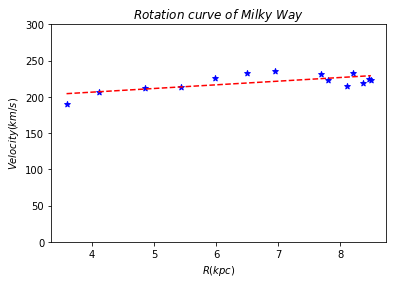

In [89]:
r = R/(1*u.kiloparsec)
from scipy.optimize import curve_fit
#Considering rotation curve to be flat, take a best fit straight line
def objective(r,a,b):
    return a*r + b
#curve fit
vel,_ = curve_fit(objective,r,V)
a,b = vel
print('V = %.5f*r + %.5f' %(a,b))
R_line = np.arange(min(r),max(r) ,0.1)
V_line = objective(R_line,a,b)
plt.scatter(R, V, marker = '*',  color='blue')
plt.plot(R_line,V_line,'--', color = 'red')
plt.ylim(0,300)
plt.xlabel('$ R(kpc)$')
plt.ylabel('$Velocity(km/s)$')
plt.title('$Rotation $ $ curve $ $ of $ $ Milky $ $ Way$')
plt.show()
